# K-近邻算法（KNN）

K nearest neighbour

## 0、导引

### 如何进行电影分类
众所周知，电影可以按照题材分类，然而题材本身是如何定义的?由谁来判定某部电影属于哪
个题材?也就是说同一题材的电影具有哪些公共特征?这些都是在进行电影分类时必须要考虑的问
题。没有哪个电影人会说自己制作的电影和以前的某部电影类似，但我们确实知道每部电影在风格
上的确有可能会和同题材的电影相近。那么动作片具有哪些共有特征，使得动作片之间非常类似，
而与爱情片存在着明显的差别呢？动作片中也会存在接吻镜头，爱情片中也会存在打斗场景，我们
不能单纯依靠是否存在打斗或者亲吻来判断影片的类型。但是爱情片中的亲吻镜头更多，动作片中
的打斗场景也更频繁，基于此类场景在某部电影中出现的次数可以用来进行电影分类。

本章介绍第一个机器学习算法：K-近邻算法，它非常有效而且易于掌握。

## 1、k-近邻算法原理

简单地说，K-近邻算法采用测量不同特征值之间的距离方法进行分类。

- 优点：精度高、对异常值不敏感、无数据输入假定。
- 缺点：时间复杂度高、空间复杂度高。
- 适用数据范围：数值型和标称型。

### 工作原理

存在一个样本数据集合，也称作训练样本集，并且样本集中每个数据都存在标签，即我们知道样本集中每一数据
与所属分类的对应关系。输人没有标签的新数据后，将新数据的每个特征与样本集中数据对应的
特征进行比较，然后算法提取样本集中特征最相似数据（最近邻）的分类标签。一般来说，我们
只选择样本数据集中前K个最相似的数据，这就是K-近邻算法中K的出处,通常*K是不大于20的整数。
最后 ，选择K个最相似数据中出现次数最多的分类，作为新数据的分类*。

回到前面电影分类的例子，使用K-近邻算法分类爱情片和动作片。有人曾经统计过很多电影的打斗镜头和接吻镜头，下图显示了6部电影的打斗和接吻次数。假如有一部未看过的电影，如何确定它是爱情片还是动作片呢？我们可以使用K-近邻算法来解决这个问题。

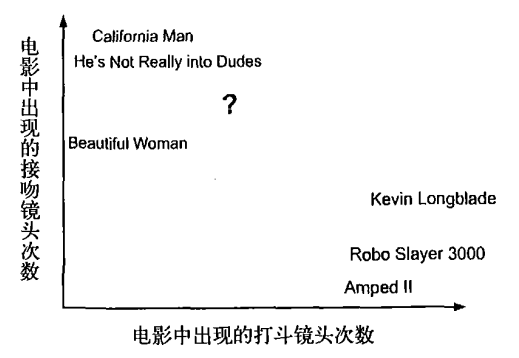

首先我们需要知道这个未知电影存在多少个打斗镜头和接吻镜头，上图中问号位置是该未知电影出现的镜头数图形化展示，具体数字参见下表。

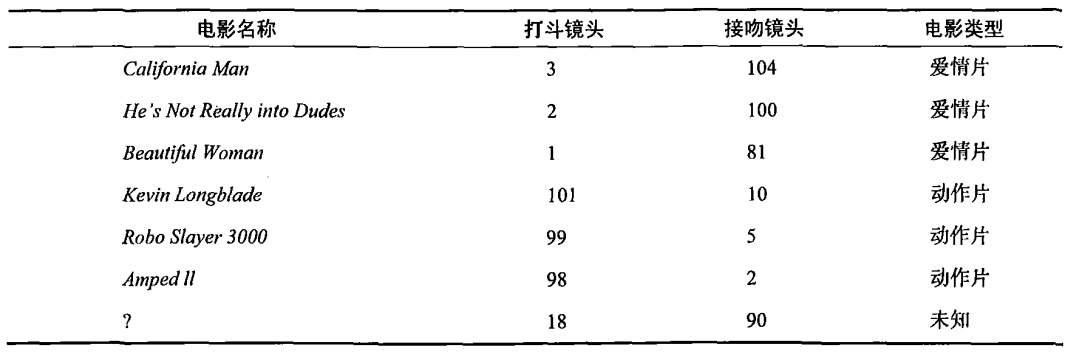

即使不知道未知电影属于哪种类型，我们也可以通过某种方法计算出来。首先计算未知电影与样本集中其他电影的距离，如图所示。

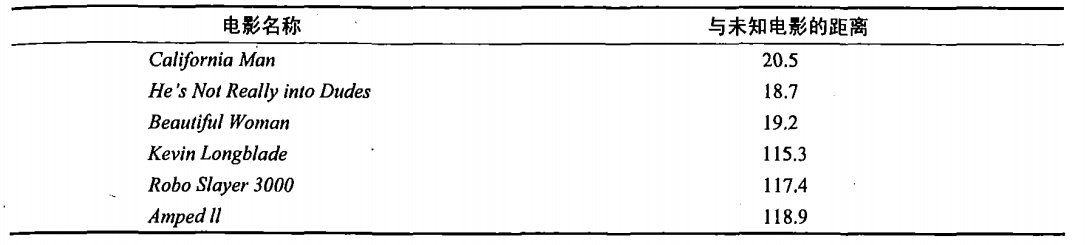

现在我们得到了样本集中所有电影与未知电影的距离，按照距离递增排序，可以找到K个距
离最近的电影。假定k=3，则三个最靠近的电影依次是California Man、He's Not Really into Dudes、Beautiful Woman。K-近邻算法按照距离最近的三部电影的类型，决定未知电影的类型，而这三部电影全是爱情片，因此我们判定未知电影是爱情片。

### 欧几里得距离(Euclidean Distance)

欧氏距离是最常见的距离度量，衡量的是多维空间中各个点之间的绝对距离。公式如下：

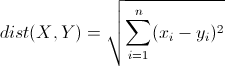

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.neighbors import KNeighborsClassifier

In [2]:
!pip install sklearn -i https://pypi.douban.com/simple

Looking in indexes: https://pypi.douban.com/simple
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1322 sha256=e2f970dea194d75f2d98a5b890d9240992fe3e8a73df8c6d7dbba6a0fb662359
  Stored in directory: C:\Users\Administrator\AppData\Local\pip\Cache\wheels\82\7b\c8\524bffad1af0af5d23d9bbc9444ed8ccf5fed065a49d479d55
Successfully built sklearn


In [ ]:
TPU

In [4]:
movie = pd.read_excel('../tests.xlsx', sheet_name=1)
movie

,电影名称,武打镜头,接吻镜头,分类情况
0,大话西游,36,1,动作片
1,杀破狼,43,2,动作片
2,前任3,0,10,爱情片
3,战狼2,59,1,动作片
4,泰坦尼克号,1,15,爱情片
5,星语心愿,2,19,爱情片


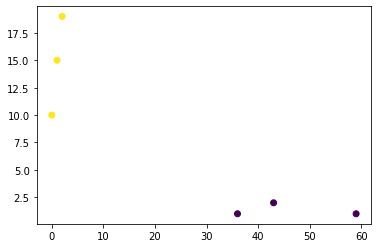

In [6]:
plt.scatter(movie['武打镜头'], movie['接吻镜头'], c=[0,0,1,0,1,1]) # 0 表示动作片, 1 表示爱情片

In [7]:
X_train = movie[['武打镜头', '接吻镜头']]
X_train.shape

(6, 2)

In [8]:
X_train

,武打镜头,接吻镜头
0,36,1
1,43,2
2,0,10
3,59,1
4,1,15
5,2,19


In [10]:
y_train = movie['分类情况']

In [11]:
knn = KNeighborsClassifier()
# 训练数据必须是2维, 标记没有要求是几维的,一般是1维, 而且也没有要求必须是数字,
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [18]:
# 预测数据
# 哪吒, 海王, 红海行动, 前任2, 
X_test = np.array([[50, 0], [40, 2], [65, 0], [1, 20]])

In [13]:
knn.predict(X_test)

array(['动作片', '动作片', '动作片', '爱情片'], dtype=object)

In [14]:
knn.score(X_test, ['动作片', '动作片', '动作片', '爱情片'])

1.0

In [16]:
knn.score(X_train, y_train)

1.0

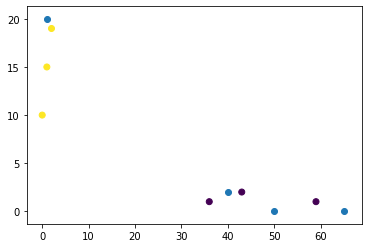

In [19]:
plt.scatter(movie['武打镜头'], movie['接吻镜头'], c=[0,0,1,0,1,1]) # 0 表示动作片, 1 表示爱情片
plt.scatter(X_test[:,0], X_test[:,1])

## 2、在scikit-learn库中使用k-近邻算法

- 分类问题：from sklearn.neighbors import KNeighborsClassifier

- 回归问题：from sklearn.neighbors import KNeighborsRegressor

### 0）一个最简单的例子

身高、体重、鞋子尺码数据对应性别

In [37]:
X_train = [[180, 180, 43], [170, 150, 39], [173, 128, 43], [170, 140, 39], [163, 90, 39], [164, 85, 36.5], [155, 75, 35], [172, 110, 41], [165, 114, 40], [175, 130, 43], [171, 135, 43], [160, 90, 36],[160, 90, 36], [158, 85, 36]]
y_train = ['男', '男', '男','男', '男', '女', '女', '女', '男', '男', '男', '女', '女', '女']

In [38]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [39]:
X_test = [[173, 118, 42], [173, 145, 41], [173, 120, 40], [165, 95, 40], [160, 120, 41], [158, 100, 36]]
knn.predict(X_test)

array(['男', '男', '男', '女', '男', '女'], dtype='<U1')

In [40]:
knn.score(X_train,  y_train)

0.8571428571428571

In [41]:
knn.score(X_test, ['男', '男', '女', '女', '男', '女'])

0.8333333333333334

### 1）用于分类

导包，机器学习的算法KNN、数据鸢尾花


In [43]:
from sklearn.datasets import load_iris

In [44]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

获取训练样本

In [45]:
data = iris['data']
target = iris['target']

In [51]:
X_train, X_test, y_train, y_test  = train_test_split(data, target, test_size=0.2)

In [52]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train).score(X_train, y_train)
knn.score(X_test, y_test)

0.9666666666666667

In [48]:
knn.score(X_test, y_test)

1.0

In [54]:
from pandas import DataFrame

In [55]:
# 从4个特征中选出两个特征来画散点图
df = DataFrame(data=data)
df.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


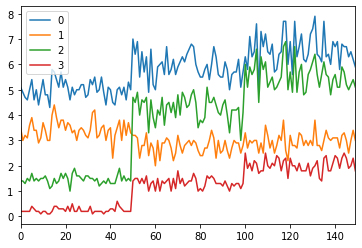

In [56]:
df.plot()

In [57]:
# 选择前两个特征
data = data[:,0:2]
data.shape

(150, 2)

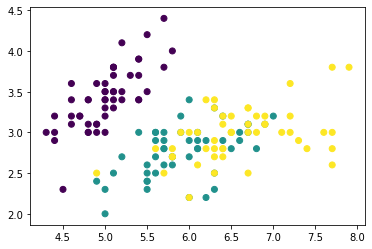

In [58]:
plt.scatter(data[:,0], data[:,1], c=target)

In [59]:
# 先生成线段上的范围
x, y = np.linspace(data[:,0].min(), data[:,0].max(), 1000), np.linspace(data[:,1].min(), data[:,1].max(), 1000)
# 范围拉起来变成2维平面
X,Y = np.meshgrid(x,y)
# 取两个平面相交的点
XY = np.c_[X.ravel(), Y.ravel()]

In [60]:
display(X, Y)

array([[4.3       , 4.3036036 , 4.30720721, ..., 7.89279279, 7.8963964 ,
        7.9       ],
       [4.3       , 4.3036036 , 4.30720721, ..., 7.89279279, 7.8963964 ,
        7.9       ],
       [4.3       , 4.3036036 , 4.30720721, ..., 7.89279279, 7.8963964 ,
        7.9       ],
       ...,
       [4.3       , 4.3036036 , 4.30720721, ..., 7.89279279, 7.8963964 ,
        7.9       ],
       [4.3       , 4.3036036 , 4.30720721, ..., 7.89279279, 7.8963964 ,
        7.9       ],
       [4.3       , 4.3036036 , 4.30720721, ..., 7.89279279, 7.8963964 ,
        7.9       ]])

array([[2.       , 2.       , 2.       , ..., 2.       , 2.       ,
        2.       ],
       [2.0024024, 2.0024024, 2.0024024, ..., 2.0024024, 2.0024024,
        2.0024024],
       [2.0048048, 2.0048048, 2.0048048, ..., 2.0048048, 2.0048048,
        2.0048048],
       ...,
       [4.3951952, 4.3951952, 4.3951952, ..., 4.3951952, 4.3951952,
        4.3951952],
       [4.3975976, 4.3975976, 4.3975976, ..., 4.3975976, 4.3975976,
        4.3975976],
       [4.4      , 4.4      , 4.4      , ..., 4.4      , 4.4      ,
        4.4      ]])

In [62]:
display(XY)

array([[4.3       , 2.        ],
       [4.3036036 , 2.        ],
       [4.30720721, 2.        ],
       ...,
       [7.89279279, 4.4       ],
       [7.8963964 , 4.4       ],
       [7.9       , 4.4       ]])

In [64]:
display(X)
display(X.ravel())

array([[4.3       , 4.3036036 , 4.30720721, ..., 7.89279279, 7.8963964 ,
        7.9       ],
       [4.3       , 4.3036036 , 4.30720721, ..., 7.89279279, 7.8963964 ,
        7.9       ],
       [4.3       , 4.3036036 , 4.30720721, ..., 7.89279279, 7.8963964 ,
        7.9       ],
       ...,
       [4.3       , 4.3036036 , 4.30720721, ..., 7.89279279, 7.8963964 ,
        7.9       ],
       [4.3       , 4.3036036 , 4.30720721, ..., 7.89279279, 7.8963964 ,
        7.9       ],
       [4.3       , 4.3036036 , 4.30720721, ..., 7.89279279, 7.8963964 ,
        7.9       ]])

array([4.3       , 4.3036036 , 4.30720721, ..., 7.89279279, 7.8963964 ,
       7.9       ])

In [65]:
knn = KNeighborsClassifier()
knn.fit(data, target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [66]:
# 预测
y_ = knn.predict(XY)

In [67]:
y_[:100]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [68]:
plt.scatter(XY[:,0], XY[:,1], c=y_)
plt.scatter(data[:,0], data[:,1], c=target, cmap='rainbow')


3.54 s ± 36 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x0000000010ADE510> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000000010B48EA0> (for post_execute):


KeyboardInterrupt: 

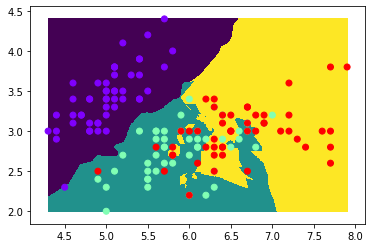

In [69]:
plt.pcolormesh(X, Y , y_.reshape(1000,1000))
plt.scatter(data[:,0], data[:,1], c=target, cmap='rainbow')

绘制图形

定义KNN分类器

第一步，训练数据

第二步预测数据：，所预测的数据，自己创造，就是上面所显示图片的背景点  

生成预测数据

对数据进行预测

显示数据

### 2）用于回归  
回归用于对趋势的预测

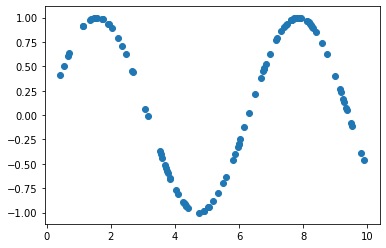

In [70]:
x = np.random.rand(100) * 10 
y = np.sin(x)
plt.scatter(x,y)

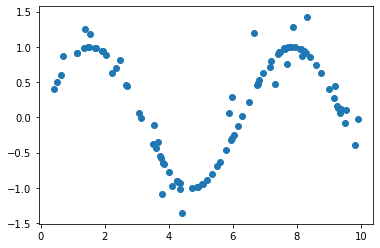

In [71]:
# 加点噪声
y[::4] += np.random.randn(25) * 0.3 
plt.scatter(x,y)

In [72]:
from sklearn.neighbors import KNeighborsRegressor

In [73]:
knn = KNeighborsRegressor()
knn.fit(x.reshape(-1,1), y)


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

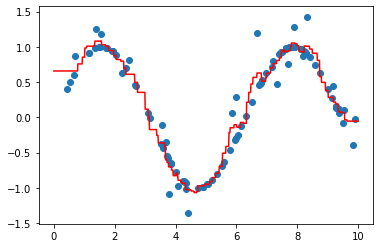

In [77]:
X_test = np.linspace(0, 10, 1000).reshape(-1,1)
y_ = knn.predict(X_test)
plt.scatter(x,y)
plt.plot(X_test, y_, c='r')

导包

生成样本数据

生成测试数据的结果

第一步：生成模型，并训练数据

第二步：使用模型，预测数据

绘图显示数据

### 练习
人类动作识别  
步行，上楼，下楼，坐着，站立和躺着  
![](stand-sit-run.jpg)  
数据采集每个人在腰部穿着智能手机，进行了六个活动（步行，上楼，下楼，坐着，站立和躺着）。采用嵌入式加速度计和陀螺仪，以50Hz的恒定速度捕获3轴线性加速度和3轴角速度，来获取数据

导入数据

In [78]:
X_train = np.load('../data/动作分析/x_train.npy')
X_test = np.load('../data/动作分析/x_test.npy')
y_train = np.load('../data/动作分析/y_train.npy')
y_test = np.load('../data/动作分析/y_test.npy')

In [79]:
X_train.shape

(7352, 561)

In [80]:
X_test.shape

(2947, 561)

In [81]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [82]:
knn.score(X_train, y_train)

0.9843579978237215

In [83]:
y_ = knn.predict(X_test)

In [84]:
knn.score(X_test,y_test)

0.9015948422124194

In [86]:
y_

array([5, 5, 5, ..., 2, 2, 1], dtype=int64)

In [87]:
label = {1:'WALKING', 2:'WALKING UPSTAIRS', 3:'WALKING DOWNSTAIRS',4:'SITTING', 5:'STANDING', 6:'LAYING'}

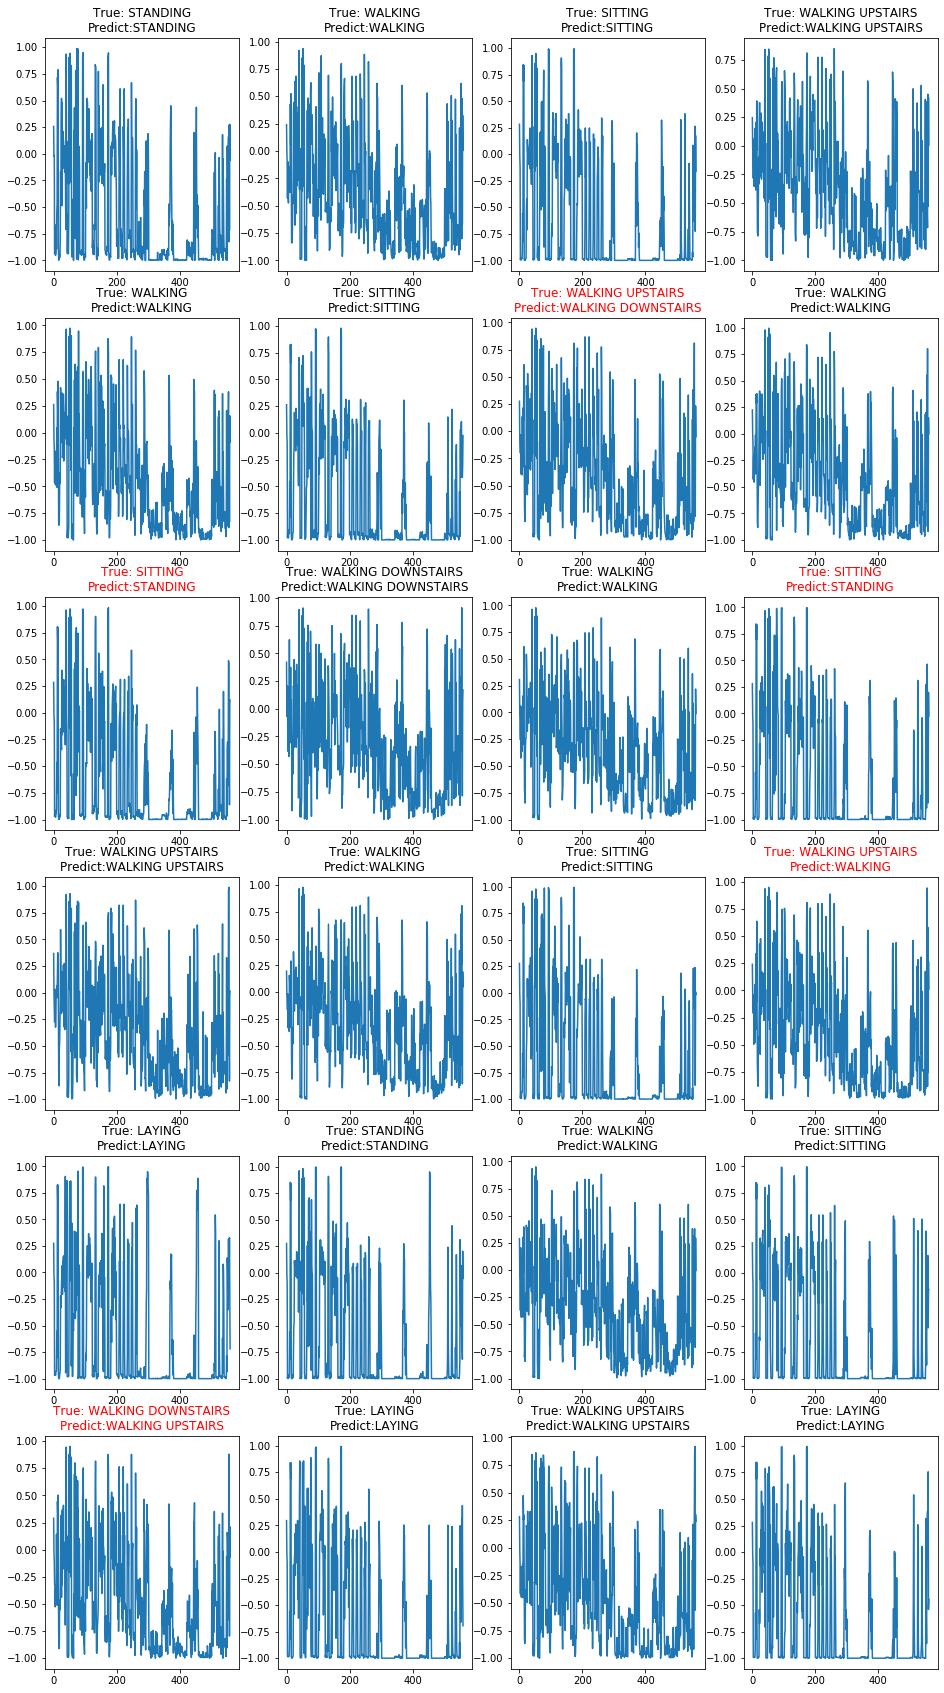

In [90]:
# 可视化预测结果
# 6行4列  24个
plt.figure(figsize=(4*4, 5 * 6))
for i in range(24):
    axes = plt.subplot(6,4,i+1)
    axes.plot(X_test[i*100])
    
    if y_test[i*100] != y_[i*100]:
        axes.set_title('True: %s\nPredict:%s'% (label[y_test[i*100]], label[y_[i*100]]), fontdict=dict(fontsize=20, color='r'))
    axes.set_title('True: %s\nPredict:%s'% (label[y_test[i*100]], label[y_[i*100]]))
    

获取数据

绘制

## 癌症预测

In [94]:
# 知识点,交叉表
cancer = pd.read_csv('../data/cancer.csv', sep='\t')
cancer.head(20)
# B : benign
# M : malignant

,ID,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_mean,...,radius_max,texture_max,perimeter_max,area_max,smoothness_max,compactness_max,concavity_max,concave_max,symmetry_max,fractal_max
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750


In [95]:
data = cancer.iloc[:,  2:]
target = cancer.Diagnosis

In [97]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=69)

In [96]:
cancer.shape

(569, 32)

In [98]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_ = knn.predict(X_test)
knn.score(X_train, y_train)

0.94

In [99]:
knn.score(X_test, y_test)

0.9565217391304348

In [101]:
# 对于这种不太好进行可视化展示的数据,我们可以使用交叉表.
pd.crosstab(index=y_test, columns=y_, rownames=['真实值'], colnames=['预测值'], margins=True)

预测值,B,M,All
真实值,,,
B,44,0,44
M,3,22,25
All,47,22,69


In [102]:
(44 + 22) / 69

0.9565217391304348

In [104]:
# 混淆矩阵
from sklearn.metrics import confusion_matrix

In [105]:
confusion_matrix(y_test, y_)

array([[44,  0],
       [ 3, 22]], dtype=int64)

## 3、作业

#### 1、预测年收入是否大于50K美元

In [106]:
adults = pd.read_csv('../data/adults.txt')
adults.head()

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


读取adult.txt文件，最后一列是年收入，并使用KNN算法训练模型，然后使用模型预测一个人的年收入是否大于50

获取年龄、教育程度、职位、每周工作时间作为机器学习数据  
获取薪水作为对应结果

In [107]:
adults.columns

Index(['age', 'workclass', 'final_weight', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'salary'],
      dtype='object')

In [125]:
data = adults[['age', 'workclass', 'education',  'marital_status', 'occupation',  'race', 'sex', 'hours_per_week', 'native_country']].copy()
target = adults.salary

In [109]:
adults.hours_per_week.mean()

40.437455852092995

In [110]:
adults.min()

age                               17
workclass                          ?
final_weight                   12285
education                       10th
education_num                      1
marital_status              Divorced
occupation                         ?
relationship                 Husband
race              Amer-Indian-Eskimo
sex                           Female
capital_gain                       0
capital_loss                       0
hours_per_week                     1
native_country                     ?
salary                         <=50K
dtype: object

In [111]:
adults.hours_per_week.max()

99

In [113]:
adults.query('hours_per_week==99')

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
935,37,Private,176900,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,99,United-States,>50K
1172,25,Private,404616,Masters,14,Married-civ-spouse,Farming-fishing,Not-in-family,White,Male,0,0,99,United-States,>50K
1887,55,Self-emp-not-inc,184425,Some-college,10,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,99,United-States,>50K
3578,37,Self-emp-inc,382802,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,Black,Male,0,0,99,United-States,>50K
4086,50,?,174964,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,99,United-States,<=50K
4308,35,Self-emp-not-inc,166416,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,99,United-States,<=50K
4441,43,Self-emp-inc,286750,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,Black,Male,0,0,99,United-States,>50K
5376,43,Private,86750,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,99,United-States,<=50K
5432,44,Private,83508,Prof-school,15,Divorced,Prof-specialty,Not-in-family,White,Female,2354,0,99,United-States,<=50K
6618,27,Private,336951,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,99,United-States,<=50K


In [112]:
99 / 7

14.142857142857142

In [114]:
adults.occupation.unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

数据转换，将String类型数据转换为int

In [115]:
data.head()

,age,workclass,education,marital_status,occupation,race,sex,hours_per_week,native_country
0,39,State-gov,Bachelors,Never-married,Adm-clerical,White,Male,40,United-States
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,White,Male,13,United-States
2,38,Private,HS-grad,Divorced,Handlers-cleaners,White,Male,40,United-States
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Black,Male,40,United-States
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Black,Female,40,Cuba


In [116]:
data.dtypes

age                int64
workclass         object
education         object
marital_status    object
occupation        object
race              object
sex               object
hours_per_week     int64
native_country    object
dtype: object

In [118]:
workclass = data.workclass.unique()
workclass

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [120]:
# 返回满足条件的索引
np.argwhere(workclass=='Self-emp-not-inc')

array([[1]], dtype=int64)

In [121]:
def convert(item):
    return np.argwhere(workclass=='Self-emp-not-inc')[0,0]

In [122]:
data.workclass = data.workclass.map(convert)

In [124]:
data.head()

,age,workclass,education,marital_status,occupation,race,sex,hours_per_week,native_country
0,39,1,Bachelors,Never-married,Adm-clerical,White,Male,40,United-States
1,50,1,Bachelors,Married-civ-spouse,Exec-managerial,White,Male,13,United-States
2,38,1,HS-grad,Divorced,Handlers-cleaners,White,Male,40,United-States
3,53,1,11th,Married-civ-spouse,Handlers-cleaners,Black,Male,40,United-States
4,28,1,Bachelors,Married-civ-spouse,Prof-specialty,Black,Female,40,Cuba


In [127]:
cols = [ 'workclass', 'education',  'marital_status', 'occupation',  'race', 'sex', 'native_country']
for col in cols:
    unique = data[col].unique()
    def convert(item):
        return np.argwhere(unique==item)[0,0]
    data[col] = data[col].map(convert)

In [128]:
data.shape

(32561, 9)

In [129]:
data.head()

,age,workclass,education,marital_status,occupation,race,sex,hours_per_week,native_country
0,39,0,0,0,0,0,0,40,0
1,50,1,0,1,1,0,0,13,0
2,38,2,1,2,2,0,0,40,0
3,53,2,2,1,2,1,0,40,0
4,28,2,0,1,3,1,1,40,1


【知识点】map方法，进行数据转换

切片：训练数据和预测数据

In [133]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=1) # seed 

In [134]:
X_train[:5]

,age,workclass,education,marital_status,occupation,race,sex,hours_per_week,native_country
16465,39,1,2,1,7,0,0,40,0
5625,54,1,0,1,1,0,0,40,0
30273,32,2,1,1,5,0,0,50,0
3136,45,1,5,0,8,0,0,50,0
4521,60,2,12,1,2,1,0,40,0


In [149]:
np.random.seed(2)
np.random.rand(1)

array([0.4359949])

生成算法

In [150]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [151]:
knn.score(X_train, y_train)

0.8446329852579852

In [152]:
y_ = knn.predict(X_test)
knn.score(X_test, y_test)

0.7805926608321818

In [153]:
pd.crosstab(index=y_test, columns=y_, rownames=['真实值'], colnames=['预测值'], margins=True)

预测值,<=50K,>50K,All
真实值,,,
<=50K,4357,669,5026
>50K,760,727,1487
All,5117,1396,6513


In [160]:
data.head()

,age,workclass,education,marital_status,occupation,race,sex,hours_per_week,native_country
0,39,0,0,0,0,0,0,40,0
1,50,1,0,1,1,0,0,13,0
2,38,2,1,2,2,0,0,40,0
3,53,2,2,1,2,1,0,40,0
4,28,2,0,1,3,1,1,40,1


In [161]:
def normalized(x):
    return (x - x.min()) / (x.max() - x.min())

In [162]:
for col in data.columns:
    data[col] = data[col].transform(normalized)

In [163]:
data.head()

,age,workclass,education,marital_status,occupation,race,sex,hours_per_week,native_country
0,0.301370,0.000,0.000000,0.000000,0.000000,0.00,0.0,0.397959,0.00000
1,0.452055,0.125,0.000000,0.166667,0.071429,0.00,0.0,0.122449,0.00000
2,0.287671,0.250,0.066667,0.333333,0.142857,0.00,0.0,0.397959,0.00000
3,0.493151,0.250,0.133333,0.166667,0.142857,0.25,0.0,0.397959,0.00000
4,0.150685,0.250,0.000000,0.166667,0.214286,0.25,1.0,0.397959,0.02439


In [164]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=1)

In [165]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [166]:
knn.score(X_train, y_train)

0.863597972972973

In [167]:
y_ = knn.predict(X_test)
knn.score(X_test, y_test)

0.8140641793336404

In [ ]:
www.kaggle.com

第一步：训练数据

第二步：预测数据

保存训练模型  
from sklearn.externals import joblib

In [155]:
from sklearn.externals import joblib

In [156]:
joblib.dump(knn, filename='knn.pkl')

['knn.pkl']

In [157]:
knn = joblib.load('knn.pkl')

In [158]:
knn.predict(X_test)

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '>50K'],
      dtype=object)

In [159]:
joblib??

#### 2、小麦种类预测

读取seeds.tsv文件，最后一列是小麦品种，其他列是小麦特征

In [20]:
from sklearn.model_selection import train_test_split

In [22]:
seeds = pd.read_table('../data/seeds.tsv', header=None)
seeds.head()

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,Kama
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Kama
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,Kama
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,Kama
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,Kama


In [23]:
seeds.shape

(210, 8)

In [24]:
data = seeds.iloc[:, 0:7]
target = seeds[7]
data.shape

(210, 7)

In [25]:
target.shape

(210,)

In [26]:
X_train,  y_train, X_test, y_test = train_test_split(data, target, test_size=0.2)

In [ ]:
knn = KNeighborsClassifier()
knn.fit()

#### 3、改进约会网站的匹配效果

读取datingTestSet.txt文件，最后一列是喜欢程度。模型：根据前几列的信息，预测喜欢程度